<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/bbc_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def data_loader(data_path):

    f = open(data_path)
    data = json.load(f)

    return data

def column_selection(selected_column, data) :
    empty_column = []
    for i in data:
        empty_column.append(i[selected_column])

    return empty_column

def data_cleaner(txt_data):
    # if limit != None:
    clean_data = []
    empty_indices = []
    for i in range(len(txt_data)):
        if txt_data[i] != '':
                # print(content[i])
            clean_data.append(txt_data[i])
        else :
            empty_indices.append(i)
    # print(empty_indices)
    return clean_data , empty_indices        

def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            # list_object.pop(idx)
            del list_object[idx] 


def index_returner(df,unique_region):
    x = df[df['region'] == unique_region].index
    return x             

In [3]:
import os 
import json
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# import tensorflow as tf 
# from tensorflow import keras 
# from tensorflow.keras import layers
# from tensorflow.keras.layers import *

plt.style.use('ggplot')

In [4]:
input_path = 'drive/MyDrive/bbc_news_list_uk.json'
data = data_loader(input_path)
print(data[0].keys())

dict_keys(['tags', 'title', 'news_post_date', 'raw_content', 'content', 'url', 'author', 'language', '_id', 'region', 'short_description', 'category', 'crawled_at'])


In [5]:
content = column_selection('content', data)
title = column_selection('title', data)
region  = column_selection('region', data)
short_desc = column_selection('short_description', data)
category = column_selection('category', data)

In [6]:
print('content_len:', len(content))
print('title_len:', len(title))
print('region_len:', len(region))
print('desc_len:', len(short_desc))
print('category_len:', len(category))

content_len: 15825
title_len: 15825
region_len: 15825
desc_len: 15825
category_len: 15825


In [7]:
for i in range(len(region)):
    if region[i] == '':
        region[i] = 'NO_INFO'

In [8]:
clean_content,empty_indices_content = data_cleaner(content)

In [9]:
clean_title,empty_indices_title = data_cleaner(title)
clean_region,empty_indices_region = data_cleaner(region)
clean_short_desc,empty_indices_short_desc = data_cleaner(short_desc)
clean_category,empty_indices_category = data_cleaner(category)

In [10]:
# delete_multiple_element(clean_content,empty_indices_content)
delete_multiple_element(clean_title,empty_indices_content)
delete_multiple_element(clean_region,empty_indices_content)
delete_multiple_element(clean_short_desc,empty_indices_content)
delete_multiple_element(clean_category,empty_indices_content)

In [11]:
print('Clean Content Length :',len(clean_content))
print('Clean Title Length :',len(clean_title))
print('Clean Region Length :',len(clean_region))
print('Clean ShortDescription Length :',len(clean_short_desc))
print('Clean Category Length :',len(clean_category))

Clean Content Length : 15468
Clean Title Length : 15468
Clean Region Length : 15468
Clean ShortDescription Length : 15468
Clean Category Length : 15468


In [12]:
df_clean = pd.DataFrame({
    'content': clean_content,
    'title' : clean_title,
    'region' : clean_region,
    'desc' : clean_short_desc,
    'category' : clean_category
})
df_clean.head(1)

,content,title,region,desc,category
0,The heroin substitute methadone can be used as...,Why quitting heroin substitute methadone is 'v...,Health,Heroin substitute methadone is used to wean ad...,BBC News


In [13]:
print('number of unique region :',df_clean['region'].nunique())
# print(df_clean['region'].unique())

number of unique region : 84


In [14]:
new_df = pd.DataFrame(df_clean.groupby(['region'])['region'].count())
new_df = new_df.rename(columns = {'region':'counts'})
new_df = new_df.reset_index()


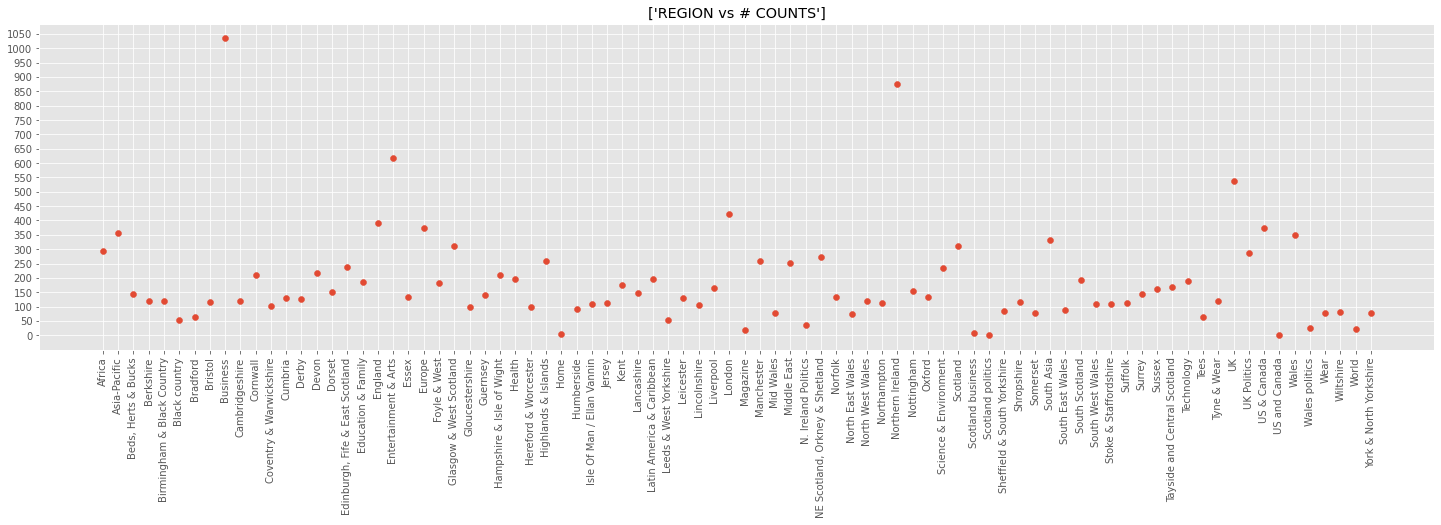

In [15]:
plt.figure(figsize=(25,6))
plt.scatter(new_df['region'], new_df['counts'])
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1100, 50));
plt.title(['REGION vs # COUNTS']);

In [16]:
# def json_maker(query, id, content, title, region, desc):
#     return {'query':str(query),'ID':id,'CONTENT':content, 'TITLE':title, 'REGION':region, 'DESCRIPTION':desc}
# def info_print(index_num):
    
#     print('CONTENT:', df_clean['content'][index_num])
#     print('TITLE:', df_clean['title'][index_num])
#     print('REGION:', df_clean['region'][index_num])
#     print('DESC:', df_clean['desc'][index_num])

## CLUSTERING & DIMENSIONALITY REDUCTION

In [17]:
!pip install umap-learn -q
!pip install hdbscan -q
!pip install umap-learn[plot] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [18]:
import umap ### dimensionality reduction algorithm
import hdbscan ### clustering algorithm
import umap.plot
from hdbscan import flat
import plotly.express as px

In [19]:
### BBC VECTOR EMBEDDINGS
vector_dir = 'drive/MyDrive/BBC_content_vectors.npy'
embedding_vectors = np.load(vector_dir)
print((embedding_vectors).shape)

(15468, 1536)


In [20]:
# umap_data = umap.UMAP(n_neighbors=20, n_components=2, min_dist=0, metric='euclidean').fit_transform(embedding_vectors)
umap_data = umap.UMAP(n_components=2, init = 'random', random_state = 0).fit_transform(embedding_vectors)

In [21]:
cluster = hdbscan.HDBSCAN(
                        min_cluster_size = 20,
                        metric = 'euclidean' ,
                        # cluster_selection_method = 'eom'
                        ).fit(umap_data)

In [22]:
print('NUMBER OF REDUCED DATA :',len(umap_data))
print('NUMBER OF EMBEDDINGS :',len(embedding_vectors))
print('NUMBER OF CLUSTERS :',len(set(cluster.labels_)))

NUMBER OF REDUCED DATA : 15468
NUMBER OF EMBEDDINGS : 15468
NUMBER OF CLUSTERS : 115


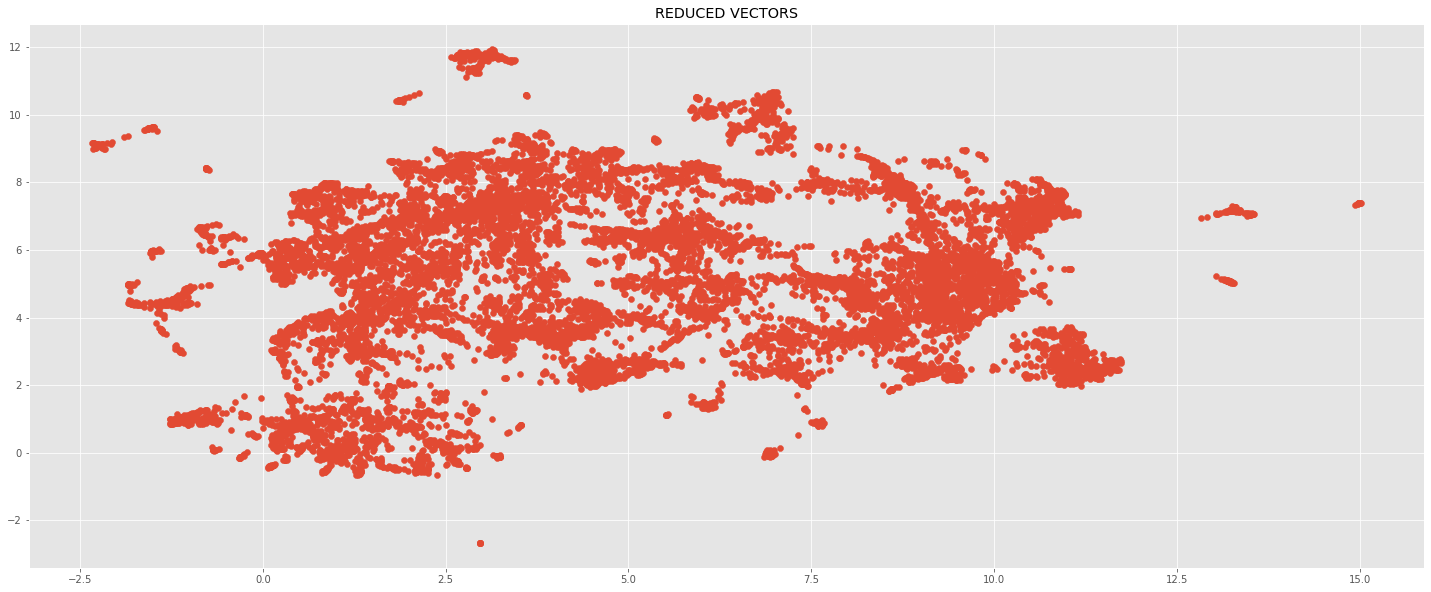

In [23]:
plt.figure(figsize=(25,10))
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.title('REDUCED VECTORS');

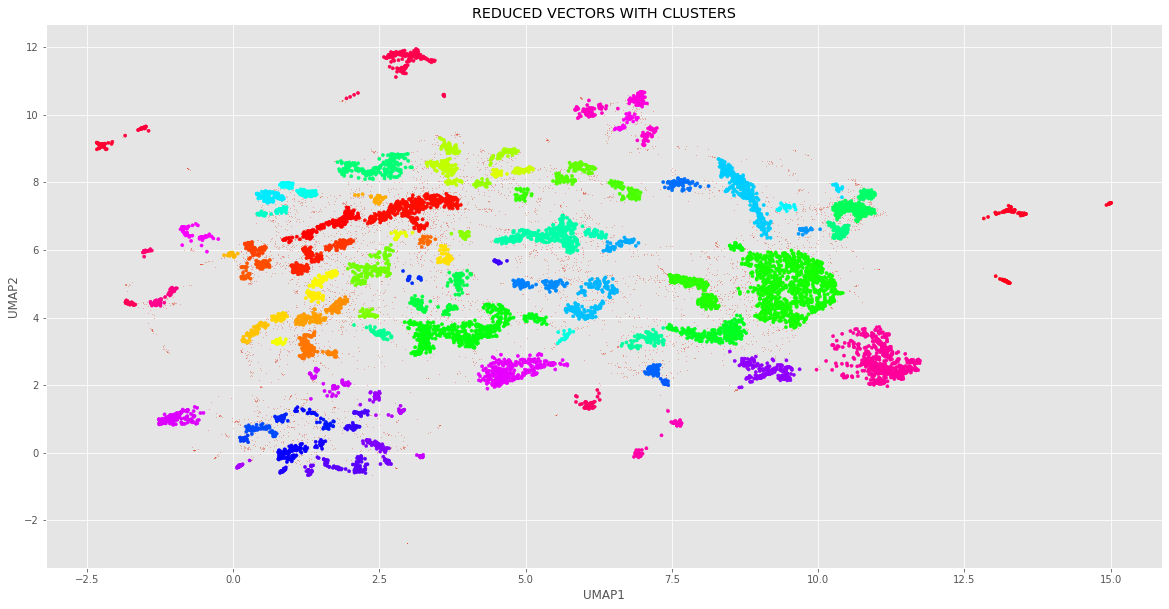

In [24]:
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y,
            # color='#BDBDBD',
            s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10,
            cmap='hsv_r'
            )
# plt.xlim([0,20])
# plt.legend([result['labels'].unique()])
# plt.colorbar()
# plt.axis('off')
plt.xlabel('UMAP1');
plt.ylabel('UMAP2');
plt.title('REDUCED VECTORS WITH CLUSTERS');

In [25]:
umap_data_3d = umap.UMAP(n_components=3, init = 'random', random_state = 0).fit_transform(embedding_vectors)
fig = px.scatter_3d(
    umap_data_3d, 
    x=0, y=1, z=2,
    width=800, height=800,
    color = cluster.labels_
)
fig.show()